### Capstone: Lift Charts for classification

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [222]:
data = pd.read_csv('data/cleaned_eda_data.csv', index_col = 0)

In [223]:
#data.groupby('new_fund_2019').mean()

In [287]:
data = data.loc[data['AUM'] < 1]

In [288]:
data.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,...,redemption_12M,new_Fund_added_12M,sales_2019,new_fund_2019,CustomerID,Firm ID,Office ID,Channel,Sub channel,Firm name


In [289]:
X = data.drop(['new_fund_2019', 'sales_2019'], axis = 1)
y = data['new_fund_2019']

In [290]:
X.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,...,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,CustomerID,Firm ID,Office ID,Channel,Sub channel,Firm name


In [291]:
X = X[['no_of_sales_12M_1', 'AUM', 'sales_12M', 'new_Fund_added_12M']]

In [292]:
X['AUM'].describe(percentiles = np.linspace(0, 1, 11))

count    0.0
mean     NaN
std      NaN
min      NaN
0%       NaN
10%      NaN
20%      NaN
30%      NaN
40%      NaN
50%      NaN
60%      NaN
70%      NaN
80%      NaN
90%      NaN
100%     NaN
max      NaN
Name: AUM, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

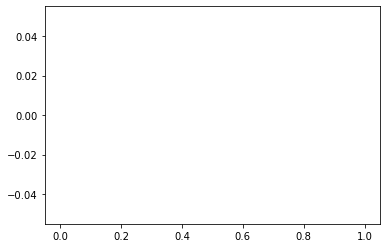

In [293]:
plt.hist(np.log1p(X['no_of_sales_12M_1']))

In [294]:
from sklearn.preprocessing import PowerTransformer

In [295]:
ptransformer = PowerTransformer()

In [296]:
X_train_transformed = ptransformer.fit_transform(X_train)

In [297]:
X_train_transformed.shape

(3760, 4)

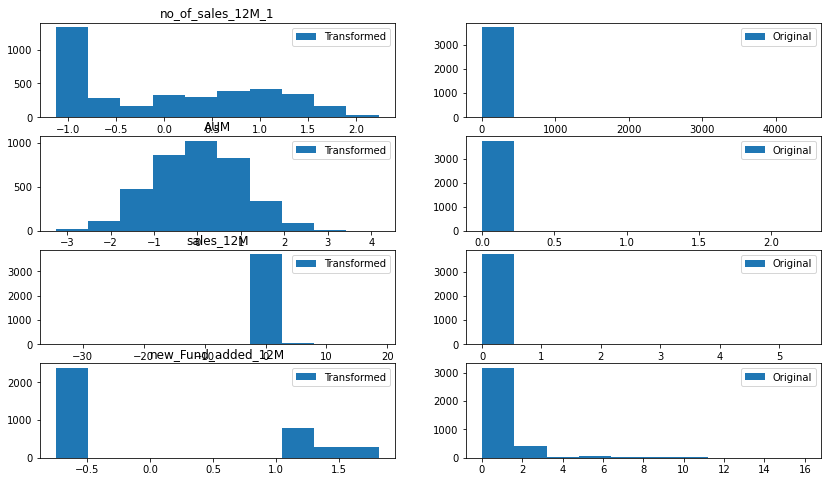

In [298]:
fig, ax = plt.subplots(4, 2, figsize = (14, 8))
for i in range(4):
    ax[i, 0].hist(X_train_transformed[:, i], label = 'Transformed')
    ax[i, 1].hist(X_train.iloc[:, i], label = 'Original')
    ax[i, 0].legend()
    ax[i, 1].legend()
    ax[i, 0].set_title(f'{X_train.columns[i]}')

In [299]:
pd.qcut(X['new_Fund_added_12M'], 5, duplicates = 'drop')

Series([], Name: new_Fund_added_12M, dtype: category
Categories (0, interval[float64]): [])

In [300]:
X.describe()

,no_of_sales_12M_1,AUM,sales_12M,new_Fund_added_12M
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [301]:
y = np.where(y>0, 1, 0)

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [303]:
pipe = make_pipeline(PolynomialFeatures(), StandardScaler(), LogisticRegression())

In [304]:
params = {'polynomialfeatures__degree': [1, 2],
         'logisticregression__C': [0.001, 0.1, 1.0, 10.]}

In [305]:
grid = GridSearchCV(pipe, param_grid=params)

In [306]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.1, 1.0, 10.0],
                         'polynomialfeatures__degree': [1, 2]})

In [307]:
grid.best_params_

{'logisticregression__C': 10.0, 'polynomialfeatures__degree': 1}

In [308]:
grid.score(X_test, y_test)

0.7288676236044657

In [309]:
grid.score(X_train, y_train)

0.7444148936170213

In [310]:
pd.value_counts(y_test, normalize = True)

0    0.732855
1    0.267145
dtype: float64

In [166]:
positive_probs = grid.predict_proba(X_test)[:, 1]
negative_probs = grid.predict_proba(X_test)[:, 0]

In [167]:
prob_df = pd.DataFrame({'prob': negative_probs, 'new_fund': y_test})

In [168]:
def lift_chart(probas, y, category = 'pos'):
    prob_df = pd.DataFrame({'prob': probas, 'y': y})
    if category == 'neg':
        prob_df['y'] = np.where(prob_df['y'] == 0, 1, 0)
    prob_df['decile'] = pd.qcut(prob_df['prob'], 10)
    lift_df = prob_df.groupby('decile')['y'].agg(['count', 'sum'])
    lift = lift_df['sum']/lift_df['sum'].sum()
    lift_df = pd.DataFrame({'lift': lift, 'deciles': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]})
    lifts = lift_df.sort_values('deciles')['lift'].cumsum().values
    lifts = np.insert(lifts, 0, 0)
    return lifts

In [248]:
prob_df.head()

,prob,new_fund,decile
0,0.634273,0,"(0.614, 0.644]"
1,0.690412,0,"(0.69, 0.692]"
2,0.687497,0,"(0.681, 0.69]"
3,0.671914,1,"(0.655, 0.681]"
4,0.514495,0,"(0.153, 0.528]"


In [254]:
prob_df.index = X_test.index

In [256]:
whole_Df = pd.concat((X_test, prob_df), axis = 1)

<AxesSubplot:ylabel='decile'>

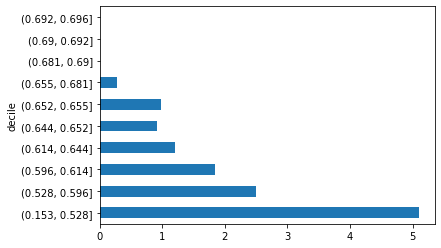

In [311]:
whole_Df.groupby('decile')['new_Fund_added_12M'].mean().plot(kind = 'barh')

In [170]:
prob_df['decile'] = pd.qcut(prob_df['prob'], 10)

In [171]:
prob_df.head()

,prob,new_fund,decile
0,0.634273,0,"(0.614, 0.644]"
1,0.690412,0,"(0.69, 0.692]"
2,0.687497,0,"(0.681, 0.69]"
3,0.671914,1,"(0.655, 0.681]"
4,0.514495,0,"(0.153, 0.528]"


In [172]:
np.where(prob_df['new_fund'] == 0, 1, 0)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

In [173]:
lift_df = prob_df.groupby('decile')['new_fund'].agg(['count', 'sum'])

In [174]:
lift = lift_df['sum']/lift_df['sum'].sum()

In [175]:
lift_df = pd.DataFrame({'lift': lift, 'deciles': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]})

In [176]:
lifts = lift_df.sort_values('deciles')['lift'].cumsum().values

In [177]:
lifts = np.insert(lifts, 0, 0)

In [178]:
neg_lift = lift_chart(negative_probs, y_test, 'neg')

In [179]:
pos_lift = lift_chart(positive_probs, y_test)

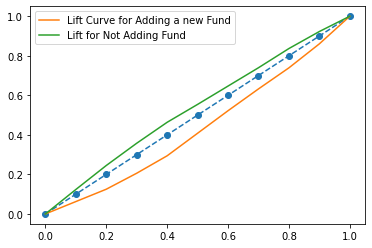

In [180]:
x = [0, 0.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]
plt.plot(x, x, '--o')
plt.plot(x, lifts, label = 'Lift Curve for Adding a new Fund')
plt.plot(x, neg_lift, label = 'Lift for Not Adding Fund')
plt.legend();

In [181]:
probas = grid.predict_proba(X_test)

In [182]:
import scikitplot as skplot

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


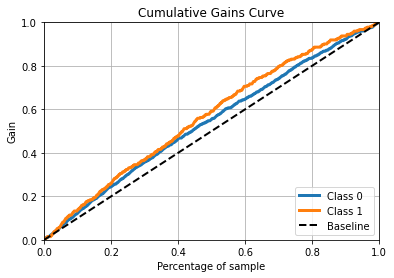

In [184]:
skplot.metrics.plot_cumulative_gain(y_test, probas);

In [188]:
lift_df = pd.DataFrame({'baseline': x, 'lift': lift_chart(probas[:, 1], y_test)})

In [189]:
lift_df['lift_over_average'] = lift_df['lift'] - lift_df['baseline']

In [190]:
lift_df

,baseline,lift,lift_over_average
0,0.0,0.000000,0.000000
1,0.1,0.139706,0.039706
2,0.2,0.261029,0.061029
3,0.3,0.367647,0.067647
4,0.4,0.477941,0.077941
5,0.5,0.591912,0.091912
6,0.6,0.705882,0.105882
7,0.7,0.794118,0.094118
8,0.8,0.875000,0.075000
9,0.9,0.937500,0.037500
